# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | bovalino superiore
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | katsuren-haebaru
Processing Record 8 of Set 1 | farah
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | caleta de carquin
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | merizo village
Processing Record 17 of Set 1 | nieuw amsterdam
Processing Record 18 of Set 1 | sajir
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,17.22,94,75,7.60,PT,1707081100
1,tura,25.5198,90.2201,13.14,43,34,1.56,IN,1707081101
2,papatowai,-46.5619,169.4708,14.92,95,99,2.97,NZ,1707081101
3,katsuura,35.1333,140.3000,7.29,77,100,4.64,JP,1707081101
4,bovalino superiore,38.1833,16.1667,14.62,77,0,3.79,IT,1707081102


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,17.22,94,75,7.60,PT,1707081100
1,tura,25.5198,90.2201,13.14,43,34,1.56,IN,1707081101
2,papatowai,-46.5619,169.4708,14.92,95,99,2.97,NZ,1707081101
3,katsuura,35.1333,140.3000,7.29,77,100,4.64,JP,1707081101
4,bovalino superiore,38.1833,16.1667,14.62,77,0,3.79,IT,1707081102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

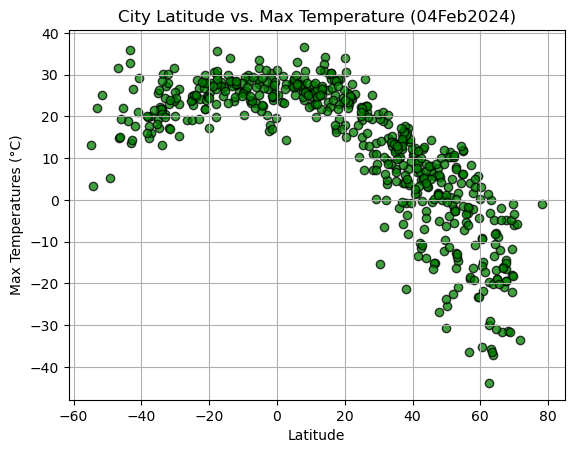

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (°C)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

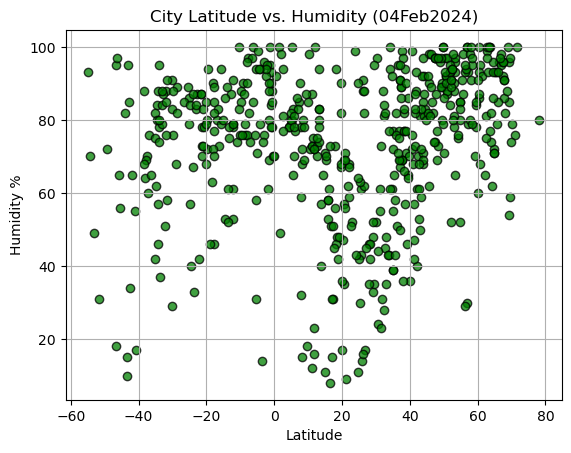

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

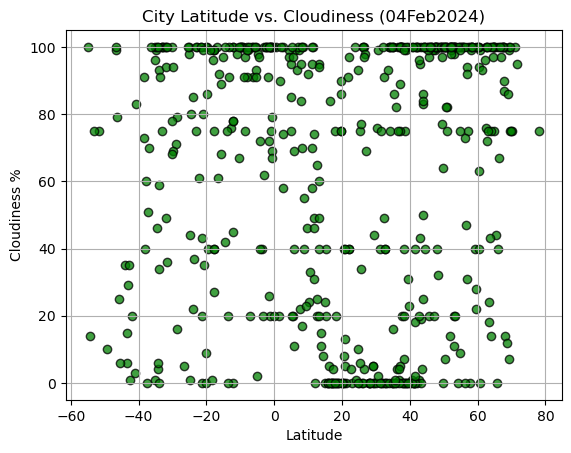

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

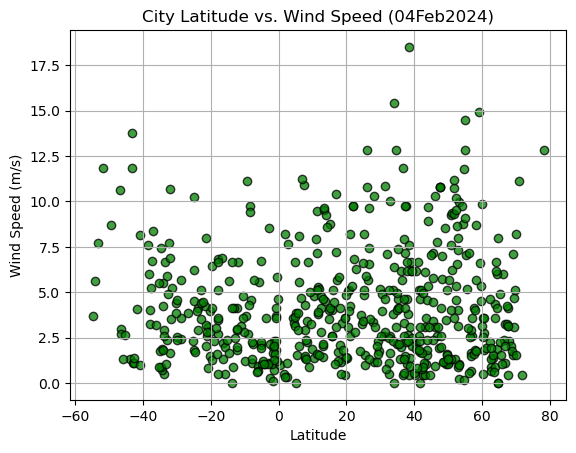

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LinReg(x_data, y_data, annotate_position):
    slope, intercept, r, p, std_err=linregress(x_data, y_data)
    fit=slope*x_axis+intercept
    plt.plot(x_data, fit, '--', color='red', )
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(annotate_position),fontsize=15,color="red")
    print(f'The r-value is:{r}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df['Lat']>0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,17.22,94,75,7.60,PT,1707081100
1,tura,25.5198,90.2201,13.14,43,34,1.56,IN,1707081101
3,katsuura,35.1333,140.3000,7.29,77,100,4.64,JP,1707081101
4,bovalino superiore,38.1833,16.1667,14.62,77,0,3.79,IT,1707081102
5,hawaiian paradise park,19.5933,-154.9731,23.35,82,90,1.34,US,1707080560


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,14.92,95,99,2.97,NZ,1707081101
10,ushuaia,-54.8000,-68.3000,13.17,93,100,3.70,AR,1707081104
13,caleta de carquin,-11.0925,-77.6267,25.74,74,98,3.12,PE,1707081106
18,bredasdorp,-34.5322,20.0403,22.24,84,46,1.88,ZA,1707081039
19,puerto natales,-51.7236,-72.4875,25.25,31,75,11.83,CL,1707081108


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8452146945078398


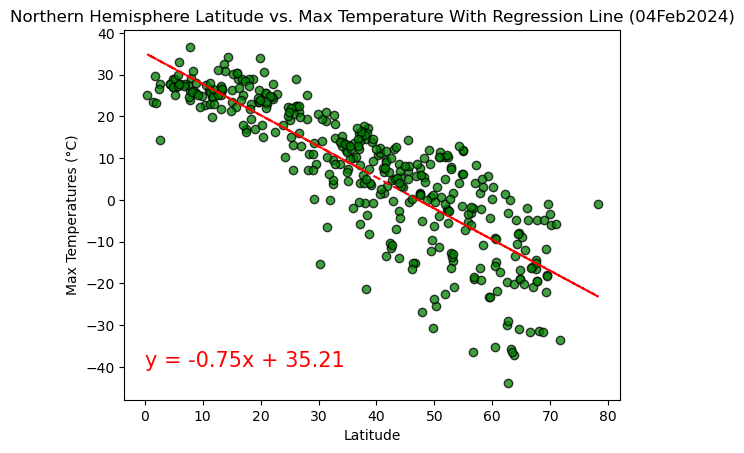

In [15]:
# Linear regression on Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Max Temp']
Poss=0,-40
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere Latitude vs. Max Temperature With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (°C)')
plt.show()

The r-value is:0.444790458030208


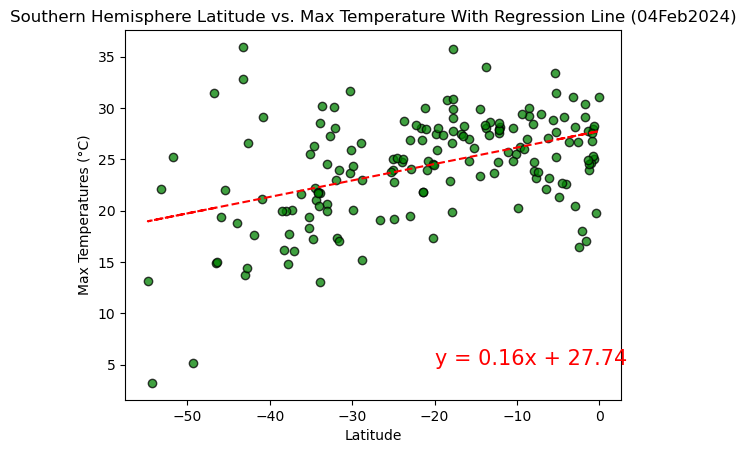

In [16]:
# Linear regression on Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Max Temp']
Poss=-20,5
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere Latitude vs. Max Temperature With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (°C)')
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere the is a negative correlation, as latitude increases, temperature decreases. While the Southern Hemisphere has a positive correlation, as latitude increases, temperatures increase. This is due to the way latitude is identified, i.e. 0 at the equator and increasing toward the North pole, while decreasing toward the South pole. The coldest areas are at the North and South poles. Therefore, as the latitude goes toward the equator the temperature increases. In the Northern Hemisphere latitudes closer to the equator are lower latitudes than the North pole, while in the Southern Hemisphere latitudes closer to the equator are higher latitudes than the South pole, thus the opposite linear relationship.
     
Furthermore, the r values indicate that the correlation between Latitude and Temperature is higher in the Northern Hemisphere than the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3893749010982089


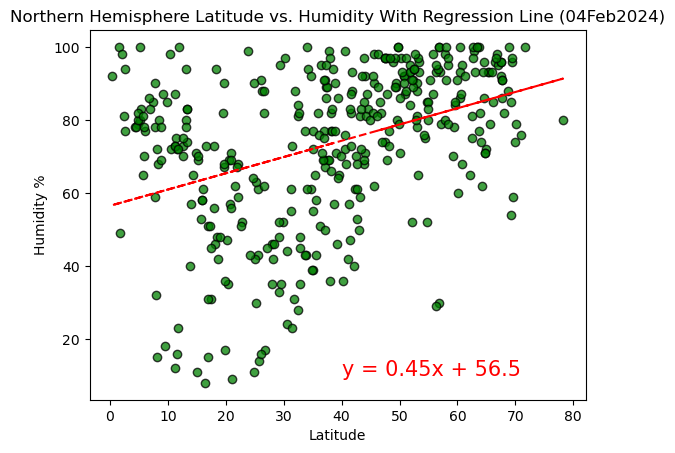

In [17]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Humidity']
Poss=40,10
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere Latitude vs. Humidity With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()


The r-value is:0.32212789410118925


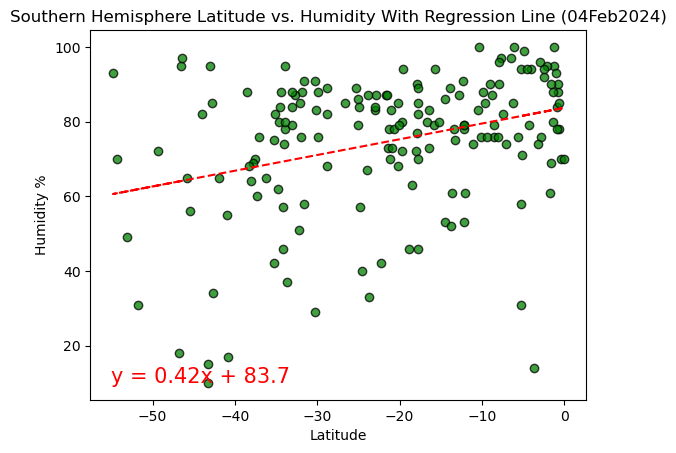

In [18]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Humidity']
Poss=-55,10
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere Latitude vs. Humidity With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** 

Both Hemispheres have a slight positive correlation between Latitude and Humidity. Neither are strong correlations though, with many outliers in both. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2754577879103714


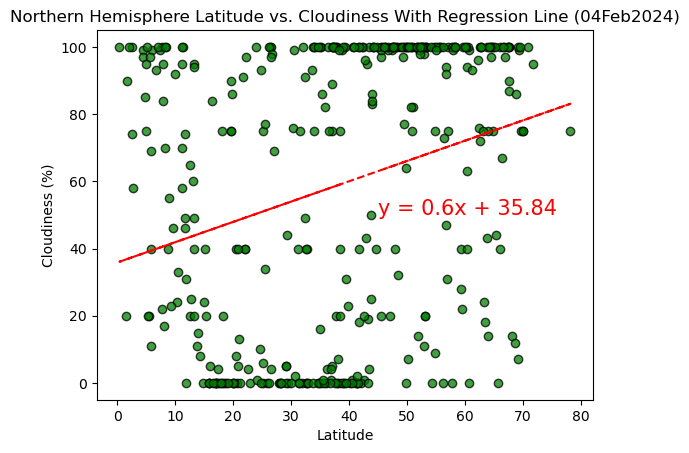

In [19]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Cloudiness']
Poss=45,50
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere Latitude vs. Cloudiness With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is:0.26375088110549566


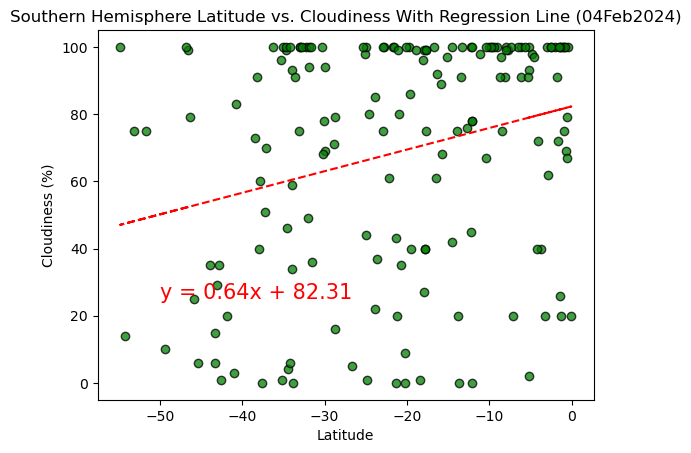

In [20]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Cloudiness']
Poss=-50,25
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere Latitude vs. Cloudiness With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:**

Both Hemispheres have a slight positive correlation between Latitude and Cloudiness. Neither are strong correlations though, with many outliers in both. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.00041274434788916495


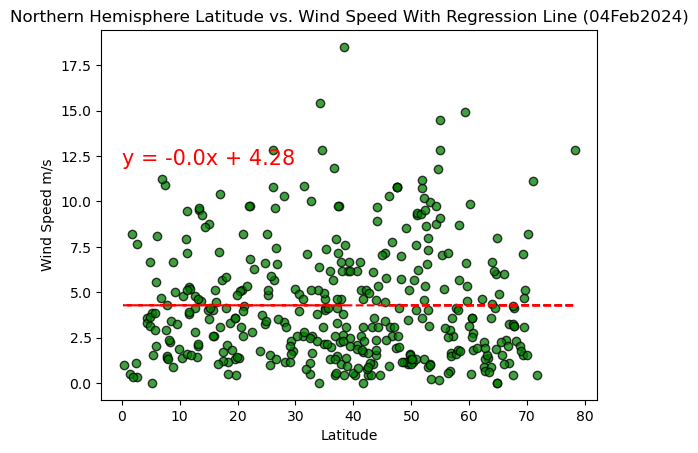

In [21]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Wind Speed']
Poss=0,12
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere Latitude vs. Wind Speed With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.show()

The r-value is:-0.3041181248171693


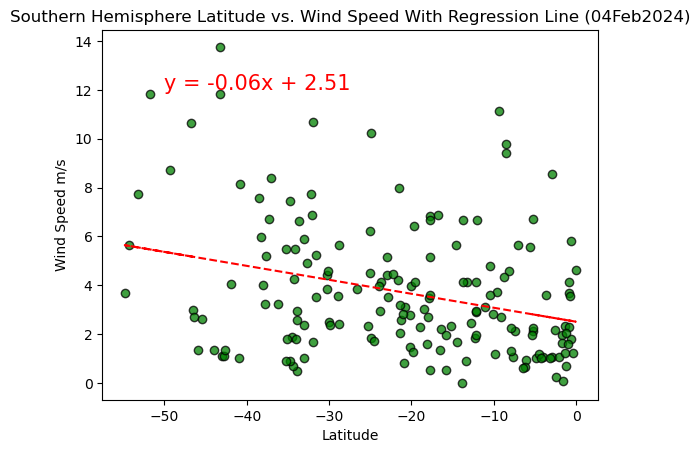

In [22]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Wind Speed']
Poss=-50,12
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere Latitude vs. Wind Speed With Regression Line (04Feb2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.show()

**Discussion about the linear relationship:**

There does not appear to be a correlation between Latitude and Wind Speed in either the Northern or Southern Hemispheres. I suspect Wind speed would vary greatly due to weather patterns, and not be effected by latitude. 